In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from tpot import TPOTClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import OneHotEncoder, StackingEstimator
from xgboost import XGBClassifier

In [3]:
base_path = "C:\\Users\\vbaub\\Equinix\\datasets\\LEFL\\"
ex1_path = os.path.join(base_path, 'Ex1 - Modeling sample.csv')

In [4]:
dataset = pd.read_csv(ex1_path)
dataset.head()

,loanid,model1,model2,target,sample
0,1,0.014187,0.010911,0,testing
1,2,0.016760,0.029098,0,testing
2,3,0.015092,0.019482,0,testing
3,4,0.015403,0.019324,0,testing
4,5,0.020180,0.031430,0,testing


In [5]:
dataset.shape

(22083, 5)

Target: Count
0    21622
1      461
Name: target, dtype: int64


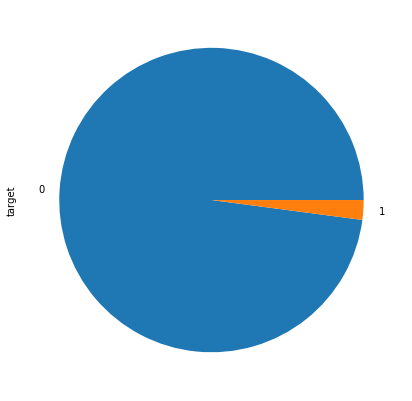

In [6]:
print("Target: Count")
print(dataset.target.value_counts(dropna = False))
dataset.target.value_counts(dropna = False).plot(kind = 'pie', figsize = (7,7))

In [7]:
## Observation #1
obsr_1 = "Data is not balance. We have 98% Target 0 and 2% Target 1 Records!!!"
print(obsr_1)

Data is not balance. We have 98% Target 0 and 2% Target 1 Records!!!


In [8]:
# Approach   :  upper resembling

In [9]:
from sklearn.utils import resample
df_majority = dataset[dataset.target==0]
df_minority = dataset[dataset.target==1]

In [9]:
df_majority.shape

(21622, 5)

In [10]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=21622,random_state=123)

In [11]:
df_minority_upsampled.shape

(21622, 5)

In [12]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [13]:
df_upsampled.shape

(43244, 5)

In [14]:
df_upsampled.target.value_counts()

1    21622
0    21622
Name: target, dtype: int64

In [15]:
df_upsampled.head()

,loanid,model1,model2,target,sample
0,1,0.014187,0.010911,0,testing
1,2,0.016760,0.029098,0,testing
2,3,0.015092,0.019482,0,testing
3,4,0.015403,0.019324,0,testing
4,5,0.020180,0.031430,0,testing


In [16]:
df_upsampled['sample'].value_counts()

testing       16841
training      14467
validation    11936
Name: sample, dtype: int64

In [17]:
data_train = df_upsampled[df_upsampled['sample'] == 'training']
data_test = df_upsampled[df_upsampled['sample'] == 'testing']
data_validation = df_upsampled[df_upsampled['sample'] == 'validation']

In [18]:
X_train = data_train[['model1','model2']]
y_train = data_train['target']

X_test = data_test[['model1','model2']]
y_test = data_test['target']

In [19]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

Generation 1 - Current best internal CV score: 0.9941244156134127
Generation 2 - Current best internal CV score: 0.995783688457697
Generation 3 - Current best internal CV score: 0.9974424837034424
Generation 4 - Current best internal CV score: 0.9974424837034424
Generation 5 - Current best internal CV score: 0.998410193863217

Best pipeline: XGBClassifier(OneHotEncoder(RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100), minimum_fraction=0.25, sparse=False, threshold=10), learning_rate=0.5, max_depth=10, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.6500000000000001)
0.46784632741523663


True

In [21]:
#### TPOT Result:


In [29]:
clf_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100)),
    OneHotEncoder(minimum_fraction=0.25, sparse=False, threshold=10),
    XGBClassifier(learning_rate=0.5, max_depth=10, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.6500000000000001)
)

In [33]:
clf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('stackingestimator', StackingEstimator(estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.9000000000000001,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samp...=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6500000000000001))])

In [34]:
from sklearn.metrics import accuracy_score

In [38]:
y_train_pred = clf_pipeline.predict(X_train)
y_test_pred = clf_pipeline.predict(X_test)

In [41]:
print("Train_accuracy :", accuracy_score(y_train, y_train_pred))
print("Test_accuracy :", accuracy_score(y_test, y_test_pred))

Train_accuracy : 0.9993778945185595
Test_accuracy : 0.46458048809453123


In [42]:
## There are two reason ..1 Model over fitting 2. Data is not properly distributed

In [18]:
X = df_upsampled[['model1','model2']]
y = df_upsampled['target']

In [19]:
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [20]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline_1.py')

Generation 1 - Current best internal CV score: 0.9934094020394972
Generation 2 - Current best internal CV score: 0.9956641592333074
Generation 3 - Current best internal CV score: 0.9956641592333074
Generation 4 - Current best internal CV score: 0.9963000976389346
Generation 5 - Current best internal CV score: 0.9980921722407853

Best pipeline: RandomForestClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=6, min_samples_split=14, n_estimators=100), bootstrap=True, criterion=gini, max_features=0.3, min_samples_leaf=6, min_samples_split=14, n_estimators=100)
0.9982656954561221


True